# Hello world

In [445]:
%matplotlib inline

import matplotlib.pyplot as plt
from igraph import *

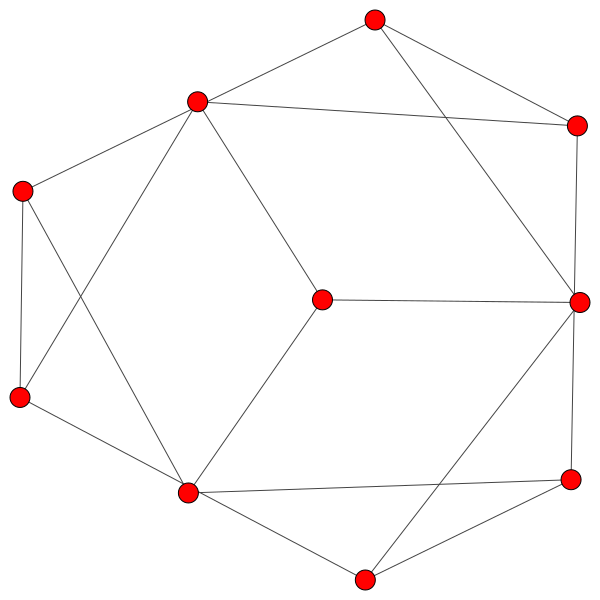

In [2]:
g = Graph.Famous("petersen")
plot(g)

In [6]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 0, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 1, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 2, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 3, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 4, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 5, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 6, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 7, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 8, {}),
 igraph.Vertex(<igraph.Graph object at 0x00000249430CE4F8>, 9, {})]

# Adding custom attributes to vertices: a code

In [26]:
from igraph import *

In [242]:
from random import randint, sample, choices

# sample: sample without replacement
# choices: sample with replacement

N = 10 # Number of street segments/vertices

# Unique code generator 
unique_code = list(range(N))
print('Unique codes:', unique_code) 

# Random code generator
#weights = [55, 5, 5, 5, 5, 5, 5, 5, 5, 5] # for biasing sample choices. Has to be same length as population being sampled (N)
#random_id = choices(unique_id, weights=weights, k=N)
random_code = choices(unique_code, k=N)
print('Random IDs:', random_code)

Unique codes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Random IDs: [7, 1, 5, 0, 2, 2, 2, 6, 7, 9]


In [243]:
# Code select
code = random_code

In [244]:
# Graph with given number of nodes n and edge probability p (p parameter can be replaced with m, the number of edges)
# https://igraph.org/python/doc/igraph.GraphBase-class.html#Erdos_Renyi
graph = Graph.Erdos_Renyi(n=N, m=N*2, directed=False, loops=False)

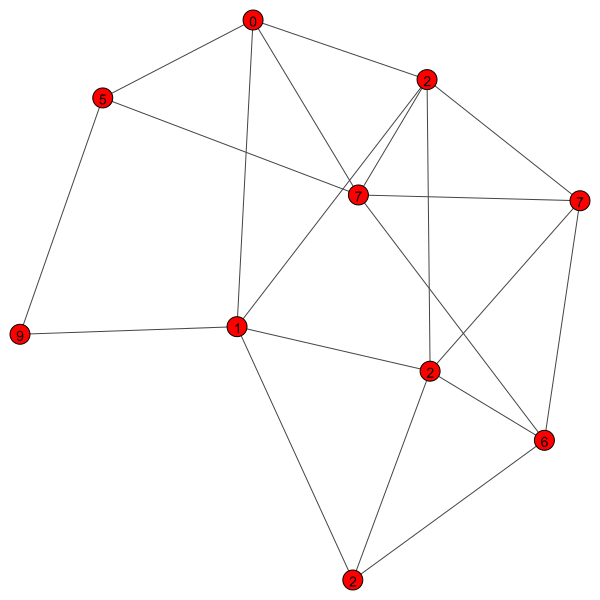

In [245]:
# Assign 'id' attribute to each vertex according to ID list of choice (unique or random)
graph.vs['code'] = code

# Plot with IDs
plot(graph, vertex_label=code)

# https://igraph.org/python/doc/tutorial/tutorial.html#creating-a-graph-from-scratch 
# Plotting tutorial

In [246]:
# Access neighbors of vertices by ID
# Vertex ID: always unique no matter the code 
# Vertex Code: the code given to each vertex, representing some landmark sequence observed on over that street segment
for vertex in graph.vs:
    neighbors = graph.neighbors(vertex, mode="all")
    print('Vertex ID: ', vertex.index, ' // Vertex Code: ', vertex['code'], '- Neighbors:', graph.vs[neighbors]['code'])


Vertex ID:  0  // Vertex Code:  7 - Neighbors: [2, 2, 6, 7]
Vertex ID:  1  // Vertex Code:  1 - Neighbors: [0, 2, 2, 2, 9]
Vertex ID:  2  // Vertex Code:  5 - Neighbors: [0, 7, 9]
Vertex ID:  3  // Vertex Code:  0 - Neighbors: [1, 5, 2, 7]
Vertex ID:  4  // Vertex Code:  2 - Neighbors: [7, 1, 0, 2, 7]
Vertex ID:  5  // Vertex Code:  2 - Neighbors: [1, 2, 6]
Vertex ID:  6  // Vertex Code:  2 - Neighbors: [7, 1, 2, 2, 6]
Vertex ID:  7  // Vertex Code:  6 - Neighbors: [7, 2, 2, 7]
Vertex ID:  8  // Vertex Code:  7 - Neighbors: [7, 5, 0, 2, 6]
Vertex ID:  9  // Vertex Code:  9 - Neighbors: [1, 5]


# Path walking

In [408]:
from random import randint, choices
 
# Source: http://igraph.wikidot.com/python-recipes#toc6
def random_walk_iter(graph, start=None): 
    current = randint(0, graph.vcount()-1) if start is None else start # TODO: make this pick a random Vertex Code?
    """
    while True: 
        #for vertex in graph.vs:
        #    neighbors = graph.neighbors(vertex, mode="all")
        #    print('Vertex ID: ', vertex.index, ' // Vertex Code: ', vertex['code'], '- Neighbors:', graph.vs[neighbors]['code'])
        yield current
        #vertex = list(graph.vs.select(code_eq = current)['code']) 
        #print('vertex is ', vertex)
        
        
        verticesWithThisCode = graph.vs.select(code_eq = current) # Extract vertices with 'code' attribute equal to "current"
        print('vertices with this code ', verticesWithThisCode)
        pickedVertex = choices(verticesWithThisCode, k=1)[0] # Randomly choose one and find its neighbors
        print('picked vertex ', pickedVertex)
        
        neighbors = graph.neighbors(pickedVertex, mode="all") 
        print('neighbors ', neighbors)
        
        
        
        current = choices(graph.vs[neighbors], k=1)[0] # Randomly choose a neighbor
        #print('neighbors of first vertex are (ID) ', graph.neighbors(vertex[0], mode="all"))
        #print('neighbors of first vertex are (Code) ', graph.vs[graph.neighbors(vertex[0], mode="all")]['code'])
        print('current is ', current)
        #current = choices(g.successors(current), k=1)[0]
    """
    current = randint(0, graph.vcount()-1) if start is None else start 
    predecessor = None
    #print('Starting from vertex (ID)', start)
    while True: 
        #print('yielding ', current)
        yield current
        neighbors = graph.successors(current) # get neighbors (ID)
        if predecessor is not None: # remove current ID so you can't return to the same vertex
            #print('predecessor:', predecessor)
            #print('neighbors before: ', neighbors)
            if predecessor in neighbors:
                neighbors.remove(predecessor)
            #print('neighbors after: ', neighbors)
        #else:
            #print(neighbors)
        predecessor = current
        if len(neighbors) > 0:
            current = choices(neighbors)[0]
            

In [347]:
from itertools import islice

walk_length = 100
walk_ID = list(islice(random_walk_iter(graph, start=5), walk_length)) # start = vertex ID to start at, not vertex code
print('Walk (ID)', walk_ID) # The walk in terms of the always unique vertex IDs

print()

walkCode = graph.vs[walk_ID]['code']
print('Walk (Code)', walkCode) # The walk translated from the unique vertex IDs to the vertex codes

Walk (ID) [5, 7, 8, 4, 3, 8, 0, 6, 4, 0, 6, 4, 8, 7, 6, 0, 7, 8, 2, 3, 4, 0, 8, 2, 3, 8, 4, 3, 8, 7, 6, 4, 1, 5, 6, 1, 5, 6, 0, 4, 3, 1, 6, 5, 7, 0, 8, 7, 5, 1, 3, 4, 1, 3, 8, 4, 3, 1, 5, 7, 0, 6, 4, 8, 0, 7, 8, 4, 0, 6, 4, 3, 2, 9, 1, 4, 8, 0, 4, 6, 5, 1, 3, 2, 9, 1, 4, 0, 7, 5, 6, 0, 4, 6, 0, 8, 4, 6, 5, 7]

Walk (Code) [2, 6, 7, 2, 0, 7, 7, 2, 2, 7, 2, 2, 7, 6, 2, 7, 6, 7, 5, 0, 2, 7, 7, 5, 0, 7, 2, 0, 7, 6, 2, 2, 1, 2, 2, 1, 2, 2, 7, 2, 0, 1, 2, 2, 6, 7, 7, 6, 2, 1, 0, 2, 1, 0, 7, 2, 0, 1, 2, 6, 7, 2, 2, 7, 7, 6, 7, 2, 7, 2, 2, 0, 5, 9, 1, 2, 7, 7, 2, 2, 2, 1, 0, 5, 9, 1, 2, 7, 6, 2, 2, 7, 2, 2, 7, 7, 2, 2, 2, 6]


# Path analysis and uniqueness checking

In [348]:
print('Walk length (ID): ', len(walk_ID), ' // Unique locations visited (ID): ', len(set(walk_ID)))
print('Walk length (Code): ', len(walkCode), ' // Unique locations visited (Code): ', len(set(walkCode)))
print('Number of vertices: ', N, ' // Number of unique vertex codes: ', len(set(code)))

Walk length (ID):  100  // Unique locations visited (ID):  10
Walk length (Code):  100  // Unique locations visited (Code):  7
Number of vertices:  10  // Number of unique vertex codes:  7


In [401]:
def isUnique(graph, walk_ID, debug=False):
    # Given the graph representing the street segments and a walk taken 
    # along the graph in progress (as a list, and not necessarily a 
    # finished walk), this returns True if the walk is unique in the graph
    # and False otherwise. Use to determine the step that uniquely identifies
    # a walk by calling the function on walks after each new step is appended.
    
    # Given the graph and the walk in terms of always unique vertex IDs, what's the shortest part of the observed 
    # walk that uniquely points to a single vertex?
    
    steps = len(walk_ID)
    
    neighborList = []
    potentialNeighbors = []
    for i in range(steps):
        code = graph.vs[walk_ID[i]]['code'] # Extract code of the actual vertex you're going to
        
        if debug:
            print('Working on code ', code)
        
        neighborsToAdd = []
        for vertex in graph.vs:
            if vertex['code'] is code:
                neighbors = graph.neighbors(vertex, mode='all')
                neighborsToAdd.append(neighbors)
                
        neighborList.append(neighborsToAdd)
                
        
        
        #print('Neighbor list (ID) so far: ', neighborList)
        
        
        if i == 0:
            potentialNeighbors = []
            for j in range(len(neighborsToAdd)):
                #print(graph.vs[neighborList[i][j]]['code'])
                potentialNeighbors.append(graph.vs[neighborList[i][j]]['code'])
        
        else:
            presenceFlags = [0]*len(potentialNeighbors)
            for j in range(len(potentialNeighbors)):
                if debug:
                    print('Checking ', potentialNeighbors[j])
                if code in potentialNeighbors[j]:
                    presenceFlags[j] = 1
                    if debug:
                        print('    Potential neighbor found')
                    
            potentialNeighbors = []
            for j in range(len(neighborsToAdd)):
                potentialNeighbors.append(graph.vs[neighborList[i][j]]['code'])

        if debug:
            print('Neighbor list (Code) of the current', code, ': ', graph.vs[graph.neighbors(graph.vs[walk_ID[i]], mode='all')]['code'])
        
            print('Potential neighbors (Code)', potentialNeighbors)
        
        if len(neighborList[i]) == 1:
            if debug:
                print('Reached uniquely occuring code', code, 'at step', i+1)
            return i 
        
        elif len(potentialNeighbors) == 1:
            if debug:
                print('Only one potential neighbor', potentialNeighbors[0], 'at step', i+1)
            return i
        
        # Extract the potential neighbor lists (code)
        # Get the next code
        # Narrow down potential neighbor lists (code) to those that include this next code
        # Repeat until only 1 potential neighbor list left
        
        
        if debug:
            print()

        
        

In [356]:
# Driving the function
skip = 0 # skip indicates the index to start the walk from to test a desired situation
print('Walk (ID): ', walk_ID[skip:])
print('Walk (Code): ', walkCode[skip:])
shortestUniqueWalk = isUnique(graph, walk_ID[skip:]) 
    

Walk (ID):  [5, 7, 8, 4, 3, 8, 0, 6, 4, 0, 6, 4, 8, 7, 6, 0, 7, 8, 2, 3, 4, 0, 8, 2, 3, 8, 4, 3, 8, 7, 6, 4, 1, 5, 6, 1, 5, 6, 0, 4, 3, 1, 6, 5, 7, 0, 8, 7, 5, 1, 3, 4, 1, 3, 8, 4, 3, 1, 5, 7, 0, 6, 4, 8, 0, 7, 8, 4, 0, 6, 4, 3, 2, 9, 1, 4, 8, 0, 4, 6, 5, 1, 3, 2, 9, 1, 4, 0, 7, 5, 6, 0, 4, 6, 0, 8, 4, 6, 5, 7]
Walk (Code):  [2, 6, 7, 2, 0, 7, 7, 2, 2, 7, 2, 2, 7, 6, 2, 7, 6, 7, 5, 0, 2, 7, 7, 5, 0, 7, 2, 0, 7, 6, 2, 2, 1, 2, 2, 1, 2, 2, 7, 2, 0, 1, 2, 2, 6, 7, 7, 6, 2, 1, 0, 2, 1, 0, 7, 2, 0, 1, 2, 6, 7, 2, 2, 7, 7, 6, 7, 2, 7, 2, 2, 0, 5, 9, 1, 2, 7, 7, 2, 2, 2, 1, 0, 5, 9, 1, 2, 7, 6, 2, 2, 7, 2, 2, 7, 7, 2, 2, 2, 6]
Working on code  2
Neighbor list (Code) of the current 2 :  [1, 2, 6]
Potential neighbors (Code) [[7, 1, 0, 2, 7], [1, 2, 6], [7, 1, 2, 2, 6]]

Working on code  6
Checking  [7, 1, 0, 2, 7]
Checking  [1, 2, 6]
    Potential neighbor found
Checking  [7, 1, 2, 2, 6]
    Potential neighbor found
Neighbor list (Code) of the current 6 :  [7, 2, 2, 7]
Potential neighbors (Code

In [357]:
print('Shortest unique walk (# steps): ', shortestUniqueWalk + 1)
print()
print('Original path (Code): ', walkCode)

Shortest unique walk (# steps):  2

Original path (Code):  [2, 6, 7, 2, 0, 7, 7, 2, 2, 7, 2, 2, 7, 6, 2, 7, 6, 7, 5, 0, 2, 7, 7, 5, 0, 7, 2, 0, 7, 6, 2, 2, 1, 2, 2, 1, 2, 2, 7, 2, 0, 1, 2, 2, 6, 7, 7, 6, 2, 1, 0, 2, 1, 0, 7, 2, 0, 1, 2, 6, 7, 2, 2, 7, 7, 6, 7, 2, 7, 2, 2, 0, 5, 9, 1, 2, 7, 7, 2, 2, 2, 1, 0, 5, 9, 1, 2, 7, 6, 2, 2, 7, 2, 2, 7, 7, 2, 2, 2, 6]


# Testing

In [501]:
from math import floor
from igraph import *
from itertools import islice
from random import randint, choices, sample, shuffle
import matplotlib.pyplot as plt

numTrials = 1000
uniquePercentage = 0.5 # from 0.0 to 1.0, the fraction of N (number of street segments) that are unique
walk_length = 100
N = 1000 # number of street segments (vertices)

uniquePercentage_list = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1] # 19 values
N_list = [10, 100, 1000, 10000] # 4 values
numTestConfigs = len(uniquePercentage_list) * len(N_list)

masterResults = {}
masterResults['averageSteps'] = [0]*numTestConfigs
masterResults['failureRate'] = [0.0]*numTestConfigs
z = 0 # iteration variable for masterResults

for N in N_list:
    for uniquePercentage in uniquePercentage_list:
        print("Working on N =", N, ", uniquePercentage =", uniquePercentage)

        results = {}
        results['walk_length'] = walk_length
        results['steps'] = [0]*numTrials
        results['averageSteps'] = 0
        results['failures'] = [0]*numTrials
        results['failureRate'] = 0.0

        for x in range(numTrials):

            #if x % 10 == 0 and x > 0:
            #    print('Working on trial ', x)


            # Unique code generator 
            unique_code = list(range(N))
            #print('Unique codes:', unique_code) 

            # Random code generator
            #weights = [55, 5, 5, 5, 5, 5, 5, 5, 5, 5] # for biasing sample choices. Has to be same length as population being sampled (N)
            numUnique = floor(N*uniquePercentage)
            random_code = sample(unique_code, k=numUnique)

            for y in range(N - numUnique):
                tmp = choices(random_code, k = 1)[0]
                random_code.append(tmp)

            shuffle(random_code) # Randomly shuffle codes (in place)

            #random_code = choices(unique_code, k=N)
            #print('Random codes:', random_code)

            # Code type select
            code = random_code

            # Graph creation
            graph = Graph.Erdos_Renyi(n=N, m=N*2, directed=False, loops=False)

            # Assign 'code' attribute to each vertex according to code list of choice (unique or random)
            graph.vs['code'] = code
            #print(code)


            #for vertex in graph.vs:
                #neighbors = graph.neighbors(vertex, mode="all")
                #print('Vertex ID: ', vertex.index, ' // Vertex Code: ', vertex['code'], '- Neighbors:', graph.vs[neighbors]['code'])

            # Plot with codes
            #layout = graph.layout("kk")
            # graph exists correctly but vertex labeling is all messed up???
            #plot(graph, vertex_label=graph.vs['code'], layout=layout)

            # Walk generation
            walk_ID = list(islice(random_walk_iter(graph, start=0), walk_length)) # start = vertex ID to start at, not vertex code

            #print('Walk (ID)', walk_ID) # The walk in terms of the always unique vertex IDs
            #print()

            walkCode = graph.vs[walk_ID]['code']
            #print('Walk (Code)', walkCode) # The walk translated from the unique vertex IDs to the vertex codes

            #print('Walk length (ID): ', len(walk_ID), ' // Unique locations visited (ID): ', len(set(walk_ID)))
            #print('Walk length (Code): ', len(walkCode), ' // Unique locations visited (Code): ', len(set(walkCode)))
            #print('Number of vertices: ', N, ' // Number of unique vertex codes: ', len(set(code)))
            #print()

            # Find shortest unique walk
            shortestUniqueWalk = isUnique(graph, walk_ID) 
            #print()

            # Results
            #print('Shortest unique walk (# steps): ', shortestUniqueWalk + 1)
            #print()
            #print('Original path (Code): ', walkCode)
            if shortestUniqueWalk is not None:
                results['steps'][x] = shortestUniqueWalk + 1
            else:
                results['failures'][x] = 1.0

        results['failureRate'] = sum(results['failures']) / len(results['failures'])

        # Drop 0 steps before calculating average 
        resultsTrimmed = []
        for i in range(len(results['steps'])):
            if results['steps'][i] > 0:
                resultsTrimmed.append(results['steps'][i])
        if len(resultsTrimmed) > 0:
            results['averageSteps'] = sum(resultsTrimmed) / len(resultsTrimmed)
        else:
            results['averageSteps'] = 0
        
        # Log masterResults
        masterResults['averageSteps'][z] = results['averageSteps']
        masterResults['failureRate'][z] = results['failureRate']      
        z += 1
        
        plt.xlabel('Number of steps')
        plt.ylabel('Probability')
        plt.title('PDF: steps needed (' + str(uniquePercentage*100) + '% unique codes, ' + str(N) + ' vertices,  ' + str(numTrials) + ' trials)')

        #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
        #fig.show()

        #plt.figure(figsize=(10, 6), dpi=80)
        stepsMax = max(results['steps'])
        stepsMin = min(results['steps'])
        if stepsMax == stepsMin:
            bins = 1
        else:
            bins = stepsMax - stepsMin

        plt.hist(results['steps'], bins=bins, density=True)
        filename = 'pdf_' + str(uniquePercentage) + 'unique_' + str(N) + 'vertices_' + str(numTrials) + 'trials.png'
        plt.savefig(filename)
        plt.clf() # reset figure content

Working on N = 10 , uniquePercentage = 1.0
Working on N = 10 , uniquePercentage = 0.95
Working on N = 10 , uniquePercentage = 0.9
Working on N = 10 , uniquePercentage = 0.85
Working on N = 10 , uniquePercentage = 0.8
Working on N = 10 , uniquePercentage = 0.75
Working on N = 10 , uniquePercentage = 0.7
Working on N = 10 , uniquePercentage = 0.65
Working on N = 10 , uniquePercentage = 0.6
Working on N = 10 , uniquePercentage = 0.55
Working on N = 10 , uniquePercentage = 0.5
Working on N = 10 , uniquePercentage = 0.45
Working on N = 10 , uniquePercentage = 0.4
Working on N = 10 , uniquePercentage = 0.35
Working on N = 10 , uniquePercentage = 0.3
Working on N = 10 , uniquePercentage = 0.25
Working on N = 10 , uniquePercentage = 0.2
Working on N = 10 , uniquePercentage = 0.15
Working on N = 10 , uniquePercentage = 0.1
Working on N = 100 , uniquePercentage = 1.0
Working on N = 100 , uniquePercentage = 0.95
Working on N = 100 , uniquePercentage = 0.9
Working on N = 100 , uniquePercentage = 0

<Figure size 432x288 with 0 Axes>

In [503]:
# index 0-18: N=10, decreasing uniquePercentage
# index 19-37: N=100, ...
# index 38-56: N=1000
# index 57-75: N=10000

# Average steps vs. unique percentage for all N
# Failure rate vs. unique percentage for all N

i = 0
for N in N_list:
    plt.plot(uniquePercentage_list, masterResults['averageSteps'][i*19 : (i+1)*19])
    plt.xlabel('Percentage of unique codes from all codes')
    plt.ylabel('Average steps required for localization')
    plt.title('Average steps required vs. Unique code percentage, # of vertices: ' + str(N))
    plt.savefig('master_' + 'avgSteps_vs_uniquePercentage_' + str(N) + 'vertices.png')
    plt.clf()
    i += 1
    
i = 0
for N in N_list:
    plt.plot(uniquePercentage_list, masterResults['failureRate'][i*19 : (i+1)*19])
    plt.xlabel('Percentage of unique codes from all codes')
    plt.ylabel('Failure rate (could not localize in ' + str(walk_length) + ' steps)')
    plt.title('Failure rate vs. Unique code percentage, # of vertices: ' + str(N))
    plt.savefig('master_' + 'failureRate_vs_uniquePercentage_' + str(N) + 'vertices.png')
    plt.clf()
    i += 1

<Figure size 432x288 with 0 Axes>

In [504]:
import csv

with open('data.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(masterResults['averageSteps'])
    wr.writerow(masterResults['failureRate'])
    

Average steps to localization: 4.172901921132457
Failure rate (could not localize): 1.0999999999999999 %


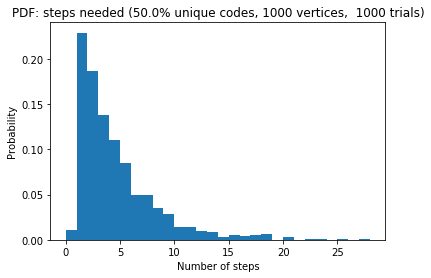

In [498]:
#plt.plot(range(numTrials), results['steps'])
plt.xlabel('Number of steps')
plt.ylabel('Probability')
plt.title('PDF: steps needed (' + str(uniquePercentage*100) + '% unique codes, ' + str(N) + ' vertices,  ' + str(numTrials) + ' trials)')

#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#fig.show()

#plt.figure(figsize=(10, 6), dpi=80)
stepsMax = max(results['steps'])
stepsMin = min(results['steps'])
if stepsMax == stepsMin:
    bins = 1
else:
    bins = stepsMax - stepsMin
    
plt.hist(results['steps'], bins=bins, density=True)
filename = 'pdf_' + str(uniquePercentage) + 'unique_' + str(N) + 'vertices_' + str(numTrials) + 'trials.png'
plt.savefig(filename)

print('Average steps to localization:', results['averageSteps'])
print('Failure rate (could not localize):', results['failureRate']*100, '%')

In [453]:
from collections import Counter

a = Counter(results['steps'])

In [454]:
a

Counter({4: 114,
         1: 210,
         2: 167,
         3: 150,
         12: 11,
         9: 24,
         20: 2,
         6: 51,
         28: 3,
         5: 88,
         8: 34,
         10: 16,
         0: 7,
         7: 46,
         13: 9,
         41: 1,
         21: 4,
         15: 7,
         14: 12,
         11: 11,
         27: 1,
         18: 6,
         23: 2,
         35: 1,
         86: 1,
         17: 2,
         24: 2,
         32: 1,
         19: 2,
         38: 1,
         22: 3,
         25: 3,
         26: 2,
         16: 2,
         37: 3,
         72: 1})

# Sanity checks, examples, etc.

In [93]:
for vertex in list(graph.vs):
    print(vertex)
# Sanity check for ID assignment

igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 0, {'id': 2})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 1, {'id': 8})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 2, {'id': 1})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 3, {'id': 4})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 4, {'id': 8})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 5, {'id': 4})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 6, {'id': 8})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 7, {'id': 3})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 8, {'id': 6})
igraph.Vertex(<igraph.Graph object at 0x00000274B9A27D68>, 9, {'id': 5})


In [ ]:
        #print(graph.vs[walk_ID[i]]) # vertex accessed by ID
        #print(graph.neighbors(graph.vs[walk_ID[i]], mode='all')) # neighbors (id)
        #print(graph.vs[graph.neighbors(graph.vs[walk_ID[i]], mode='all')]['code']) # neighbors (code)